# **Gathering data**


WeRateDogs Twitter archive

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import json
import requests
import os
import tweepy
import matplotlib.pyplot as plt
import re

In [2]:
#Reading data from csv file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

The tweet image predictions

In [3]:
#Using requests library to fetch data from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Writing the contents into a file
with open(os.path.join(url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Reading a data from a .tsv file
predictions_df = pd.read_csv('image-predictions.tsv',sep='\t')

Tweeepy data

In [6]:
#using tweepy api

#removed keys

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [7]:
# getting the list of tweet ids
list = np.array(twitter_df['tweet_id'])

In [8]:
# No. of tweet ids
list.size

2356

In [9]:
#Using tweepy and twitter api to fetch data for tweet ids
#(Doesn't show any output because it was executed 1st time for creating text file and then the code was commented to
# prevent the code from executing another time)

import time
a=0
for id in list:
    try:
        start = time.time()
        tweet = api.get_status(id,tweet_mode = 'extended')._json
        with open('my_tweet-json.txt',mode='a+') as file:
            json.dump(tweet,file)
            file.write('\n')
            end = time.time()
            print(end-start)
            a+=1
            print(a)
        
    except:
        print(str(id)+':' + ' data not available')
              

In [10]:
#Reading each line from the text file
list =[]

with open('my_tweet-json.txt')as file:
    for line in file:
        list.append(json.loads(line))    

In [11]:
#Storing retweet and favorite count
df_list = []
for x in range(len(list)):
    df_list.append({ 'tweet_id': list[x]['id'],
                     'retweet_count' : list[x]['retweet_count'],
                     'favorite_count': list[x]['favorite_count']})

In [12]:
#Creating a dataframe with fetched data
tweepy_df = pd.DataFrame(df_list,columns =['tweet_id','retweet_count','favorite_count'])

# **Assessing Data**

In [13]:
#Assessing quality and tidiness issues via programming and visualization.

In [82]:
#Visual assessment of data

In [15]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
#Visual assessment of data
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
#Visual assessment of data
tweepy_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37678
1,892177421306343426,6074,32359
2,891815181378084864,4015,24377
3,891689557279858688,8369,40994
4,891327558926688256,9072,39197
5,891087950875897856,3010,19704
6,890971913173991426,1989,11523
7,890729181411237888,18244,63543
8,890609185150312448,4132,27091
9,890240255349198849,7132,31060


In [18]:
#Looking at twitter_df data
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
#looking at predictions_df data
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
#Looking at tweepy_df data
tweepy_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37678
1,892177421306343426,6074,32359
2,891815181378084864,4015,24377
3,891689557279858688,8369,40994
4,891327558926688256,9072,39197


In [21]:
#analyzing twitter_df data
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
#analyzing tweepy_df data
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [23]:
#Analyzing predictions_df data
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
#Analyzing predictions_df data
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
twitter_df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
an             7
Daisy          7
Toby           7
Buddy          7
Koda           6
Leo            6
Oscar          6
Rusty          6
Jack           6
Stanley        6
Jax            6
Dave           6
Bella          6
Milo           6
Scout          6
Gus            5
            ... 
Wishes         1
Sailor         1
Dante          1
Stephanus      1
Napolean       1
Durg           1
Sky            1
Willie         1
Theo           1
Juckson        1
Jeffrie        1
Dallas         1
Severus        1
Blakely        1
Spencer        1
Ginger         1
Jaycob         1
Snoop          1
Eriq           1
Newt           1
Ashleigh       1
Josep          1
Obie           1
Duddles        1
Beckham        1
Dobby          1
Tug            1
Lizzie        

Quality issues

    1. Datatype of timestamp variable in twitter_df needs to be changed.
    2. We need to consider only original tweets, ignore retweets in twitter_df dataframe.
    3. Null values in expanded_urls column in twitter_df dataframe.
    4. Rating_denominator has entries with  a value of 0.
    5. Rating_denominator needs to be a constant data.
    6. Rating_numerator needs to be cleaned
    7. Names of columns in predictions_df dataframe
    8. Capitalization of p1,p2 and p3 columns in predictions_df
    9.The datatype of different columns should the reflective of the values present.
  
    
    

Tidiness issues

     1. Converting dog stages into a single column
     2. Merging all 3 df into a single one

# Cleaning Data

Making a copy of all dataframes

In [28]:
#Making a copy of all dataframes

twitter_df_clean = twitter_df.copy()
predictions_df_clean = predictions_df.copy()
tweepy_df_clean = tweepy_df.copy()

### _Fixing Quality issues_

**1.Changing the datatype of timestamp variable in twitter_df to timedate**

In [29]:
#Changing the datatype to timestamp.
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

In [30]:
#Testing whether the code has worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**2.For our analysis, we need to consider only original tweets, so we are  ignoring retweeted tweets in twitter_df.
We are gonna remove the rows whose retweeted_status_id column has values i.e the rows with values in retweeted_status_id columns are not original tweets**

In [31]:
#Selecting data that is not null
retweeted_data = twitter_df_clean[(~twitter_df_clean.retweeted_status_id.isnull())]

In [32]:
#Dropping unwanted data
twitter_df_clean.drop(index = retweeted_data.index, inplace=True)

In [33]:
#Testing whether the code has worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

**3. Null values in expanded_urls column in twitter_df dataframe.**

In [34]:
#Calculating sum of null values
twitter_df_clean.expanded_urls.isnull().sum()

58

We could see that there are around 57 null values in expanded_urls column.Its difficult to find the missing null values for expanded_urls. You can either drop the rows which contains null values or drop the expanded_urls column since its not being used for any analysis or visualization. I prefer the latter one since there is no data loss in other columns.


In [35]:
#Dropping unneeded columns
twitter_df_clean.drop(columns=['expanded_urls'],inplace=True)

In [36]:
#Testing whether the code has worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 288.9+ K

**4. We could see that there are some rows where the rating_denominator values are 0 which doesn't makes sense.So we could drop those rows from the dataframe**

In [37]:
#Calcalating the count of different values
twitter_df_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
#Neglecting rows with a denominatior of zero 
twitter_df_clean =  twitter_df_clean[twitter_df_clean.rating_denominator !=0]

In [39]:
#Testing whether the code has worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 288.7+ K

**6.Rating_numerator column needs to be cleaned**

Some tweets seem to have float values in rating_numerator which weren't extracted properly. So we need to identify the tweets with float values and extract the correct values accordingly

In [40]:
#Using regular expression to extract float values
list = twitter_df_clean[twitter_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
for x in list.index:
    val = (re.findall('(\d+\.\d+\/\d+)',list.loc[x].text))
    v1=(str(val[0]).split('/'))
    twitter_df_clean.loc[x,'rating_numerator'] = (v1[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [41]:
#Testing the extracted values
twitter_df_clean[twitter_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,13.5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,9.5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,11.26,10,None,None,None,None,None


**5.Rating denominator has multiple values other than ten.**

In [42]:
#Calculating count of denominator values
twitter_df_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
20        2
11        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

If you can see the above result, we could find there are multiple rating_denominator values.Eventhough the max. no. of values are 10, there are other values too.We can't drop other values other than 10 because there is no fixed standard denominator.
Here i am adding a new column called rating (rating = numerator/denominator) which might standardize the values to some extend.


In [43]:
twitter_df_clean.rating_numerator=twitter_df_clean['rating_numerator'].astype(float)

In [44]:
#Creating a new column called rating
twitter_df_clean['rating'] = twitter_df_clean['rating_numerator']/ twitter_df_clean['rating_denominator']

In [45]:
#Testing whether the code has worked successfully
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12.0,10,Franklin,None,None,None,None,1.2


**As we don't have image predictions for the tweets beyond August 1st 2017, we can ignore the tweets beyond this date**

In [46]:
#Ignoring tweets that are beyong 21st August 2017
twitter_df_clean =  twitter_df_clean[twitter_df_clean.timestamp < '2017-08-01']

In [47]:
#Testing whether the code has worked successfully
twitter_df_clean[(twitter_df_clean.timestamp < '2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12.0,10,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,13.0,10,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13.0,10,Jax,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,13.0,10,None,None,None,None,None,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13.0,10,Zoey,None,None,None,None,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14.0,10,Cassie,doggo,None,None,None,1.4
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,13.0,10,Koda,None,None,None,None,1.3
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,13.0,10,Bruno,None,None,None,None,1.3


**7.Changing the column names in predictions_df dataframe so that others can easily understand the values in the dataframe**

In [48]:
#Looking at column names
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
#Renaming the columns for better understanding

predictions_df_clean = predictions_df_clean.rename(columns={ 'p1': 'prediction_1',
                                      'p1_conf': 'prediction_1_confidence_level',
                                      'p1_dog' : 'prediction_1_result',
                                      'p2': 'prediction_2',
                                     'p2_conf': 'prediction_2_confidence_level',
                                     'p2_dog' : 'prediction_2_result',
                                     'p3': 'prediction_3',
                                     'p3_conf': 'prediction_3_confidence_level',
                                     'p3_dog' : 'prediction_3_result' })

In [50]:
#Testing whether the code had worked successfully
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                         2075 non-null int64
jpg_url                          2075 non-null object
img_num                          2075 non-null int64
prediction_1                     2075 non-null object
prediction_1_confidence_level    2075 non-null float64
prediction_1_result              2075 non-null bool
prediction_2                     2075 non-null object
prediction_2_confidence_level    2075 non-null float64
prediction_2_result              2075 non-null bool
prediction_3                     2075 non-null object
prediction_3_confidence_level    2075 non-null float64
prediction_3_result              2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**8.Capitalization of data in prediction columns of predictions_df dataframe**

In [51]:
#Capitalizing the data
predictions_df_clean.prediction_1 = predictions_df_clean.prediction_1.str.capitalize()
predictions_df_clean.prediction_2 = predictions_df_clean.prediction_2.str.capitalize()
predictions_df_clean.prediction_3 = predictions_df_clean.prediction_3.str.capitalize()

In [52]:
#Testing whether the code had worked successfully
predictions_df_clean[['prediction_1','prediction_2','prediction_3']].head()

,prediction_1,prediction_2,prediction_3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


**9.The datatype of different columns should the reflective of the values present.**

In [53]:
#Converting datatype of retweeted status timestamp
twitter_df_clean.retweeted_status_timestamp = pd.to_datetime(twitter_df_clean.retweeted_status_timestamp)

In [54]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2172 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
rating_numerator              2172 non-null float64
rating_denominator            2172 non-null int64
name                          2172 non-null object
doggo                         2172 non-null object
floofer                       2172 non-null object
pupper                        2172 non-null object
puppo                         2172 non-null object
rating                        2172 non-null float64
dtypes: datetime64[

## Tidiness issues


**1.Converting dog stages into a single column as the data is spread along 4 columns**

In [55]:
#Creating a new column called dog_stage
twitter_df_clean['dog_stage'] = twitter_df_clean['doggo']+twitter_df_clean['floofer']+twitter_df_clean['pupper']+twitter_df_clean['puppo']

In [56]:
#Checking whether the new column had been created
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10,Archie,None,None,None,None,1.2,NoneNoneNoneNone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10,Darla,None,None,None,None,1.3,NoneNoneNoneNone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10,Franklin,None,None,None,None,1.2,NoneNoneNoneNone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,13.0,10,None,None,None,None,None,1.3,NoneNoneNoneNone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,13.0,10,Jax,None,None,None,None,1.3,NoneNoneNoneNone


In [57]:
#Checking the values in dog stages
twitter_df_clean.dog_stage.value_counts()

NoneNoneNoneNone        1828
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [58]:
#Creating a new list that contains various dog stages
my_list = ['doggo','floofer','pupper','puppo']
multiple_list =['doggoflooferNoneNone','doggoNoneNonepuppo','doggoNonepupperNone']

In [59]:
#Defining a new function that provides correct dog stage
def standardize(string1):
    for element in my_list:
        if element in string1:
            result = element
            break
        else:
            result = 'none'
        
    if string1 in multiple_list:
        result ='multiple'
    return result    

In [60]:
#applying the function on each of the column values
twitter_df_clean.dog_stage = twitter_df_clean['dog_stage'].apply(standardize)

In [61]:
twitter_df_clean.dog_stage.value_counts()


none        1828
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [62]:
#Dropping unnecessary columns
twitter_df_clean.drop(columns=['doggo','puppo','floofer','pupper'],inplace=True)

In [63]:
#Testing whether the code had worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 2 to 2355
Data columns (total 14 columns):
tweet_id                      2172 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
rating_numerator              2172 non-null float64
rating_denominator            2172 non-null int64
name                          2172 non-null object
rating                        2172 non-null float64
dog_stage                     2172 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 254.5+ KB


**2. Merging/joining tweepy_df with twitter_df**

In [64]:
#Looking at columns of all the dataframes
twitter_df_clean.info(),tweepy_df_clean.info(),predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 2 to 2355
Data columns (total 14 columns):
tweet_id                      2172 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
rating_numerator              2172 non-null float64
rating_denominator            2172 non-null int64
name                          2172 non-null object
rating                        2172 non-null float64
dog_stage                     2172 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 254.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (t

(None, None, None)

In [65]:
#merging two dataframes
twitter_df_clean = pd.merge(twitter_df_clean,tweepy_df_clean,on=['tweet_id'],how='left')

In [66]:
twitter_df_clean = pd.merge(twitter_df_clean,predictions_df_clean,on=['tweet_id'],how='left')

In [67]:
#Testing whether the code had worked successfully
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 27 columns):
tweet_id                         2172 non-null int64
in_reply_to_status_id            77 non-null float64
in_reply_to_user_id              77 non-null float64
timestamp                        2172 non-null datetime64[ns]
source                           2172 non-null object
text                             2172 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null datetime64[ns]
rating_numerator                 2172 non-null float64
rating_denominator               2172 non-null int64
name                             2172 non-null object
rating                           2172 non-null float64
dog_stage                        2172 non-null object
retweet_count                    2169 non-null float64
favorite_count                   2169 non-null float64
jpg_url             

## Storing data

In [68]:
#Storing the data to a csv file
twitter_df_clean.to_csv('twitter_df_master.csv',index=False)

In [69]:
#Storing the data to a csv file
predictions_df_clean.to_csv('predictions_df_master.csv',index=False)

## Analyzing and visualizing data

#### 1.Let us try to analyze if there are any relationship between and retweet count and favorite count.

##### Visualizations

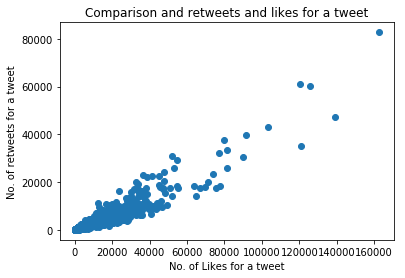

In [70]:
#Creating a scatter plot
plt.scatter(twitter_df_clean.favorite_count,twitter_df_clean.retweet_count);
plt.xlabel('No. of Likes for a tweet');
plt.ylabel('No. of retweets for a tweet');
plt.title('Comparison and retweets and likes for a tweet')
plt.show();

In [71]:
#Finding correlation value
twitter_df_clean.retweet_count.corr(twitter_df_clean.favorite_count)

0.9280292129009026

**The Correlation value is almost nearer to 1 suggesting a positive linear relationship**

In [72]:
#Using statsmodels for simple linear regression
import statsmodels.api as sm
df = pd.read_csv('twitter_df_master.csv')
df['intercept'] =1
df = df[~(df.retweet_count.isnull())]
lm = sm.OLS(df['retweet_count'],df[['intercept','favorite_count']])
results =  lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.345e+04
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:59:17   Log-Likelihood:                -19245.
No. Observations:                2169   AIC:                         3.849e+04
Df Residuals:                    2167   BIC:                         3.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -317.5518     44.846     -7.081      0.000    -405.498    -229.606
favorite_count     0.3456      0.003    115.973      0.000       0.340       0.351
==============================================================================
Omnibus:                     1822.955   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           201496.281
Skew:                           3.346   Prob(JB):                         0.00
Kurtosis:                      49.741   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-sqaured value - 0.861


**On looking at the above scatter plot and r-squared value calculated using linear regression, we can confirm that there is a strong linear relationhsip between the no. of likes and no. of retweets for a tweet.**

#### Insights(minimum of  3)

#### 2. Is there any relationship between rating and retweet count/favorite count ??

In [73]:
#Calculating correlation values for different variables
twitter_df_clean.corr()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating,retweet_count,favorite_count,img_num,prediction_1_confidence_level,prediction_2_confidence_level,prediction_3_confidence_level
tweet_id,1.000000,0.939594,0.138506,NaN,NaN,0.044367,-0.022980,0.049357,0.363763,0.587574,0.214291,0.110172,-0.001493,-0.049936
in_reply_to_status_id,0.939594,1.000000,0.140415,NaN,NaN,0.252058,-0.098026,0.270605,-0.204925,0.050578,0.076881,0.425057,-0.392543,-0.341782
in_reply_to_user_id,0.138506,0.140415,1.000000,NaN,NaN,-0.031828,-0.021885,-0.028695,-0.090694,-0.091154,NaN,NaN,NaN,NaN
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,0.044367,0.252058,-0.031828,NaN,NaN,1.000000,0.181495,0.982928,0.010884,0.009211,-0.000296,-0.008684,-0.020481,-0.004761
rating_denominator,-0.022980,-0.098026,-0.021885,NaN,NaN,0.181495,1.000000,-0.002057,-0.020149,-0.026425,-0.004121,-0.004348,-0.035001,0.007089
rating,0.049357,0.270605,-0.028695,NaN,NaN,0.982928,-0.002057,1.000000,0.014689,0.014121,0.000422,-0.008132,-0.013763,-0.005858
retweet_count,0.363763,-0.204925,-0.090694,NaN,NaN,0.010884,-0.020149,0.014689,1.000000,0.928029,0.103505,0.050795,-0.014278,-0.040530
favorite_count,0.587574,0.050578,-0.091154,NaN,NaN,0.009211,-0.026425,0.014121,0.928029,1.000000,0.129421,0.075771,-0.015774,-0.049621


**Values of 0.015071 and 0.014378 suggests that there is absolutely no relation between rating and likes/retweets count**

#### 3. Analyzing Prediction algorithm

In [74]:
#Analyzing predictions_df
predictions_df_clean.describe()

,tweet_id,img_num,prediction_1_confidence_level,prediction_2_confidence_level,prediction_3_confidence_level
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Looking at the above values, we can say that,**on average** the 1st prediction is around *60%* confident(confidence level) that the prediction might be True whereas the 2nd and 3rd prediction confidence levels are way lower than the 1st one(13% and 6%)

**4.What is the most frequent rating given for a tweet?**

In [75]:
#Calculating no. of values for rating variable
values = twitter_df_clean.rating.value_counts()

In [76]:
#Creating a new dataframe
df = pd.DataFrame(values)

In [77]:
#resetting the index
df.reset_index(inplace=True)

In [78]:
#selecting top 15 rows
df = df.iloc[:15]

In [79]:
#Selecting index column
df  = df.set_index('index')

In [80]:
#looking at values
df

,rating
index,
1.2,504
1.0,444
1.1,431
1.3,305
0.9,156
0.8,98
0.7,53
1.4,43
0.5,35


**Looking at the above results, rating of 1.2(12/10 may be) is given for 504 tweets followed by 1.0 and 1.1(i.e 10/10 and 11/10)**

Visualizing above**(Extra)**

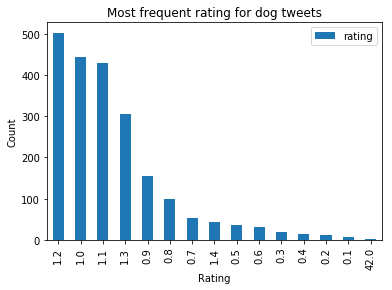

In [81]:
#Visualizing data in a bar chart
df.plot(kind='bar');
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Most frequent rating for dog tweets')
plt.show()